In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Convert World Univ Rank

In [3]:
import pandas as pd
file_path = '/content/drive/MyDrive/Data Scrapping MDS/Data Uploud Mango/World_univ_rank_2019_2025.xlsx'
df = pd.read_excel(file_path)
print(df.head())


                              University         Country Rank  Overall  \
0                   University of Oxford  United Kingdom    1     96.0   
1                University of Cambridge  United Kingdom    2     94.8   
2                    Stanford University   United States    3     94.7   
3  Massachusetts Institute of Technology   United States    4     94.2   
4     California Institute of Technology   United States    5     94.1   

   Teaching  Citations  Industry Income  International Outlook  Year  \
0      91.8       99.1             67.0                   96.3  2019   
1      92.1       97.1             52.9                   94.3  2019   
2      93.6       99.9             64.6                   79.3  2019   
3      91.9       99.9             87.6                   89.0  2019   
4      94.5       99.2             88.2                   62.3  2019   

   Research Environment  Research Quality  Student Population  \
0                  99.5               0.0               2

In [7]:
df['Research Quality / Citations'] = df['Citations'].fillna('Research Quality')
df = df.drop(['Citations', 'Research Quality'], axis=1)
display(df)

,University,Country,Rank,Overall,Teaching,Industry Income,International Outlook,Year,Research Environment,Student Population,Students per staff,International Students,Female:Male Ratio,Female(%),Male(%),Research Quality / Citations
0,University of Oxford,United Kingdom,1,96.0,91.8,67.0,96.3,2019,99.5,20300,11.0,0.4,46 : 54,46,54,99.1
1,University of Cambridge,United Kingdom,2,94.8,92.1,52.9,94.3,2019,98.8,18750,10.9,0.37,46 : 54,46,54,97.1
2,Stanford University,United States,3,94.7,93.6,64.6,79.3,2019,96.8,15878,7.4,0.23,43 : 57,43,57,99.9
3,Massachusetts Institute of Technology,United States,4,94.2,91.9,87.6,89.0,2019,92.7,11231,8.7,0.34,38 : 62,38,62,99.9
4,California Institute of Technology,United States,5,94.1,94.5,88.2,62.3,2019,97.2,2255,6.5,0.29,33 : 67,33,67,99.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14159,Zhetysu University,Kazakhstan,Reporter,0.0,0.0,0.0,0.0,2025,0.0,4872,18.2,0,66 : 34,66,34,0.0
14160,Zhytomyr Ivan Franko State University,Ukraine,Reporter,0.0,0.0,0.0,0.0,2025,0.0,4887,13.3,0,68 : 32,68,32,0.0
14161,Zhytomyr Polytechnic State University,Ukraine,Reporter,0.0,0.0,0.0,0.0,2025,0.0,6364,22.5,0,35 : 65,35,65,0.0
14162,Ziane Achour University of Djelfa,Algeria,Reporter,0.0,0.0,0.0,0.0,2025,0.0,24450,22.4,0,0,0,0,0.0


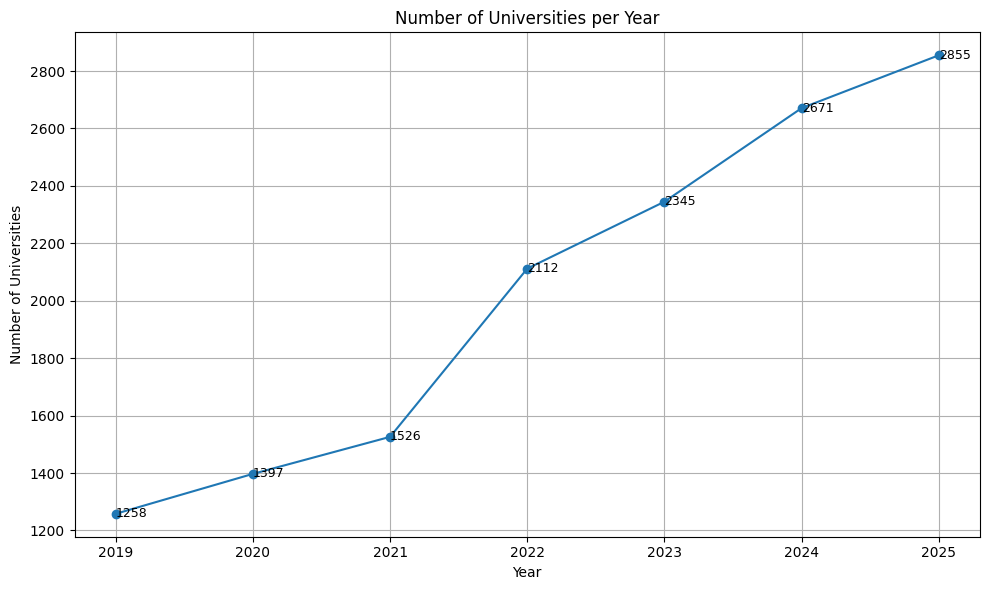

In [12]:
import matplotlib.pyplot as plt

# Hitung jumlah universitas per tahun
df_counts = df['Year'].value_counts().reset_index()
df_counts.columns = ['Year', 'University	']

# Urutkan berdasarkan tahun jika belum
df_counts = df_counts.sort_values('Year')

# Buat plot
plt.figure(figsize=(10, 6))
plt.plot(df_counts['Year'], df_counts['University	'], marker='o', linestyle='-')

# Tambahkan label nilai di tiap titik
for i, row in df_counts.iterrows():
    plt.text(row['Year'], row['University	'], str(row['University	']),
             va='center', ha='left', fontsize=9, color='black')

# Tambahkan judul dan label sumbu
plt.title('Number of Universities per Year')
plt.xlabel('Year')
plt.ylabel('Number of Universities')

# Tampilkan grid dan grafik
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd

# Daftar tahun yang ingin diambil
years = [2020, 2021, 2022, 2023, 2024, 2025]

# Filter hanya tahun-tahun tersebut
df_filtered = df[df['Year'].isin(years)]

# Ambil Top 10 Universitas per tahun
top10_per_year = {
    year: df_filtered[df_filtered['Year'] == year]['University'].drop_duplicates().head(10).tolist()
    for year in years
}

# Pastikan setiap list panjangnya 10, isi dengan None jika kurang
for year in years:
    top10_per_year[year] += [None] * (10 - len(top10_per_year[year]))

# Buat dataframe tabel
top10_table = pd.DataFrame(top10_per_year)

# Tampilkan tabel
display(top10_table)


,2020,2021,2022,2023,2024,2025
0,University of Oxford,University of Oxford,University of Oxford,University of Oxford,University of Oxford,University of Oxford
1,California Institute of Technology,Stanford University,California Institute of Technology,Harvard University,Stanford University,Massachusetts Institute of Technology
2,University of Cambridge,Harvard University,Harvard University,University of Cambridge,Massachusetts Institute of Technology,Harvard University
3,Stanford University,California Institute of Technology,Stanford University,Stanford University,Harvard University,Princeton University
4,Massachusetts Institute of Technology,Massachusetts Institute of Technology,University of Cambridge,Massachusetts Institute of Technology,University of Cambridge,University of Cambridge
5,Princeton University,University of Cambridge,Massachusetts Institute of Technology,California Institute of Technology,Princeton University,Stanford University
6,Harvard University,"University of California, Berkeley",Princeton University,Princeton University,California Institute of Technology,California Institute of Technology
7,Yale University,Yale University,"University of California, Berkeley","University of California, Berkeley",Imperial College London,"University of California, Berkeley"
8,The University of Chicago,Princeton University,Yale University,Yale University,"University of California, Berkeley",Imperial College London
9,Imperial College London,The University of Chicago,The University of Chicago,Imperial College London,Yale University,Yale University


In [14]:
import pandas as pd
import json

# Konversi ke JSON (array of objects) dan simpan ke file
output_path = '/content/drive/MyDrive/Data Scrapping MDS/Data Uploud Mango/world_rank.json'

# Pastikan direktori sudah ter-mount di Google Colab
df.to_json(output_path, orient='records', indent=4)

print(f'File JSON berhasil disimpan di: {output_path}')

File JSON berhasil disimpan di: /content/drive/MyDrive/Data Scrapping MDS/Data Uploud Mango/world_rank.json


## Convert Impact Rank

In [16]:
import pandas as pd
file_path = '/content/drive/MyDrive/Data Scrapping MDS/Data Uploud Mango/univ_impact_rank.xlsx'
df_impact = pd.read_excel(file_path)
print(df_impact.head())

  Rank SDGS Overall  Year                        University        Country  \
0                 1  2020            University of Auckland    New Zealand   
1                 2  2020          The University of Sydney      Australia   
2                 3  2020         Western Sydney University      Australia   
3                 4  2020               La Trobe University      Australia   
4                 5  2020  Arizona State University (Tempe)  United States   

   Overall SDGS  Zero Hunger Impact_life_below_water  \
0          98.5         85.2                    95.8   
1          98.1         86.9                       0   
2          97.9         70.3                    92.9   
3          96.6          0.0                    79.6   
4          96.3         77.7                    95.2   

  Impact_industry_innovation_and_infrastructure  \
0                                             0   
1                                          93.9   
2                                        

In [17]:
import pandas as pd
import json

# Konversi ke JSON (array of objects) dan simpan ke file
output_path = '/content/drive/MyDrive/Data Scrapping MDS/Data Uploud Mango/univ_impact_rank.json'

# Pastikan direktori sudah ter-mount di Google Colab
df_impact.to_json(output_path, orient='records', indent=4)

print(f'File JSON berhasil disimpan di: {output_path}')

File JSON berhasil disimpan di: /content/drive/MyDrive/Data Scrapping MDS/Data Uploud Mango/univ_impact_rank.json
